In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump

In [4]:
# Read data
dataset = pd.read_csv('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/Corrosion_potential.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   319 non-null    int64  
 1   Composition  319 non-null    object 
 2   Environment  319 non-null    int64  
 3   PH           319 non-null    float64
 4   [Cl-]        319 non-null    float64
 5   [SO42-]      319 non-null    float64
 6   VEC          319 non-null    float64
 7   σVEC         319 non-null    float64
 8   ΔSmix        319 non-null    float64
 9   ΔHmix        319 non-null    float64
 10  Ω            319 non-null    float64
 11  δ            319 non-null    float64
 12  rbar         319 non-null    float64
 13  Δχ           319 non-null    float64
 14  χbar         319 non-null    float64
 15  e/a          319 non-null    float64
 16  Tm           319 non-null    float64
 17  σT           319 non-null    float64
 18  Ec           319 non-null    float64
 19  Al      

In [5]:
# Remove unnecessary axes
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Al', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('δ', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('Δχ', axis=1)
dataset = dataset.drop('Fe', axis=1)
dataset = dataset.drop('Ni', axis=1)
dataset = dataset.drop('Cu', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Nb', axis=1)

dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
σVEC           0
ΔHmix          0
χbar           0
e/a            0
Tm             0
Co             0
Cr             0
Y              0
Ecorr          4
dtype: int64

In [6]:
# Remove blank lines
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   σVEC         315 non-null    float64
 4   ΔHmix        315 non-null    float64
 5   χbar         315 non-null    float64
 6   e/a          315 non-null    float64
 7   Tm           315 non-null    float64
 8   Co           315 non-null    float64
 9   Cr           315 non-null    float64
 10  Y            315 non-null    float64
 11  Ecorr        315 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 32.0 KB


In [7]:
from sklearn.model_selection import train_test_split


# Divide data into X and y axes
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150
                                                    )

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Save data standardization tool
# dump(sc, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/Corrosion_potential.pkl', 'wb'))

# Machine learning

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regression model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Predictive test set
y_pred_test = rf.predict(X_test)

# Predictive training set
y_pred_train = rf.predict(X_train)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print('The evaluation index of the random forest initial training regression model:')

# Calculate R^2 score
score_test = rf.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 score
score_train = rf.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

The evaluation index of the random forest initial training regression model:
R^2 score on the test set： 0.7411119643817745
R^2 score on the training set： 0.8826388922131654
MAE on the test set: 0.10184422751322753
MAE on the training set: 0.05546970530990171
MSE on the test set: 0.020727211447661383
MSE on the training set: 0.007499694512694164
RMSE on test set: 0.14396948095919976
RMSE on the training set: 0.086600776628701


<Figure size 800x600 with 0 Axes>

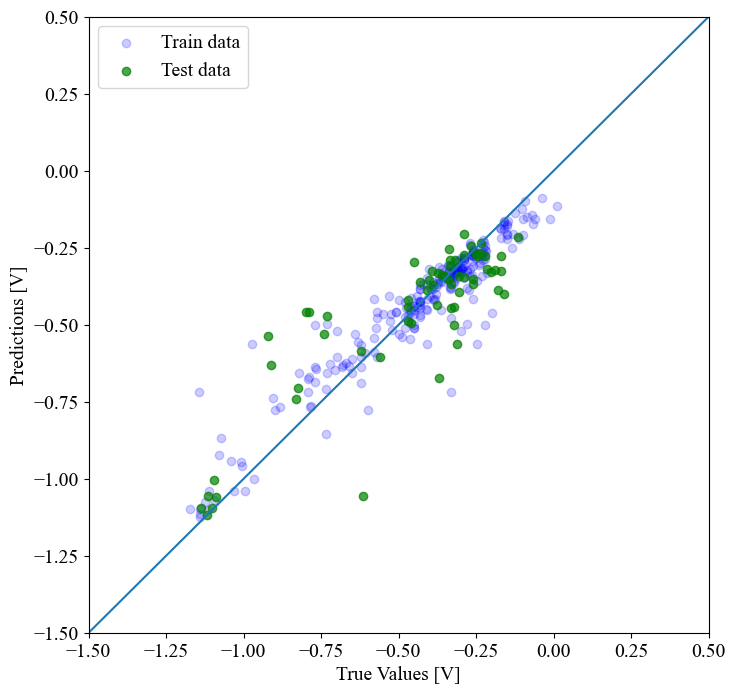

In [11]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# The performance diagram of the model on the training set and the verification set
test_predictions = rf.predict(X_test).flatten()
train_predictions = rf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.331527
7            Tm    0.100178
8            Co    0.086778
5          χbar    0.082872
3          σVEC    0.082204
6           e/a    0.075600
4         ΔHmix    0.059972
9            Cr    0.055388
10            Y    0.054030
2         [Cl-]    0.051902
0   Environment    0.019549


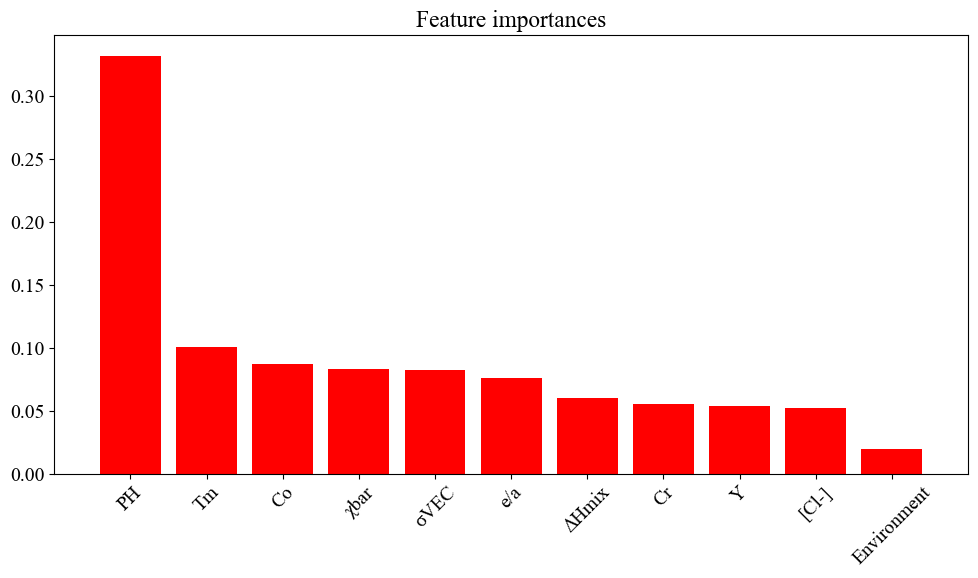

In [12]:
# Get the name of the input feature
feature_names = dataset.columns[:-1]

# Output each feature name and corresponding importance value
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# Draw a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [15]:
# Save the trained model
dump(rf, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/RF_5.pkl', 'wb'))

# Cross-validation

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor


# Create a random forest regression model
cv_rf = RandomForestRegressor()

# Predictive training set
y_pred_train_cv = cross_val_predict(cv_rf, X_train, y_train, cv=5)

# Fit the model on the entire training set
cv_rf.fit(X_train, y_train)

# Predictive test set
y_pred_test_cv = cv_rf.predict(X_test)

In [17]:
print('The evaluation index of random forest cross-validation regression model:')

# Calculate R^2 score
score_test = cv_rf.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# calculateR^2Score
score_train = cv_rf.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

The evaluation index of random forest cross-validation regression model:
R^2 score on the test set： 0.7339614540165438
R^2 score on the training set： 0.8796634969780736
MAE on the test set: 0.10135265835222985
MAE on the training set: 0.13755431708238858
MSE on the test set: 0.02129969885498751
MSE on the training set: 0.037397074763728305
RMSE on test set: 0.14594416348380468
RMSE on the training set: 0.19338323289191414


<Figure size 800x600 with 0 Axes>

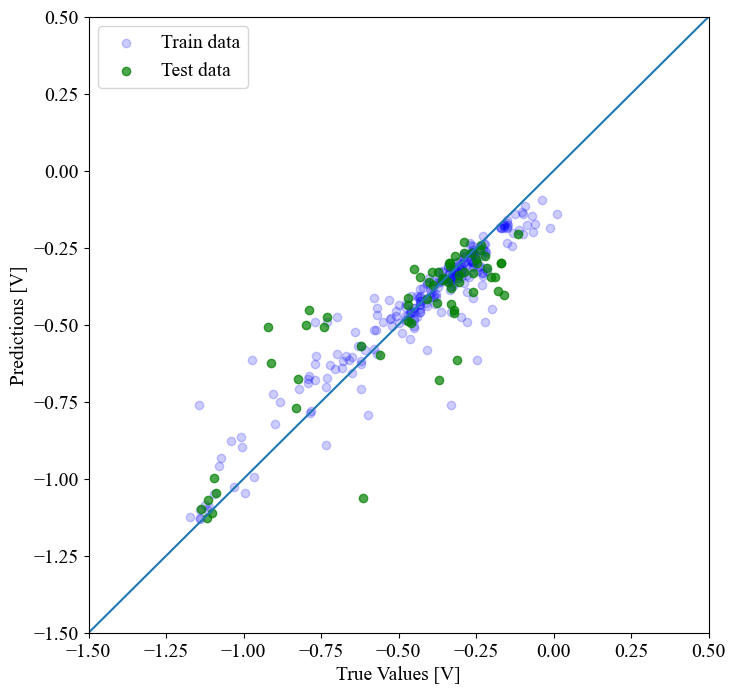

In [18]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# The performance diagram of the model on the training set and the verification set
test_predictions = cv_rf.predict(X_test).flatten()
train_predictions = cv_rf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.335196
7            Tm    0.102649
8            Co    0.082191
5          χbar    0.080343
3          σVEC    0.079208
6           e/a    0.078122
4         ΔHmix    0.064312
9            Cr    0.062052
2         [Cl-]    0.049191
10            Y    0.044645
0   Environment    0.022090


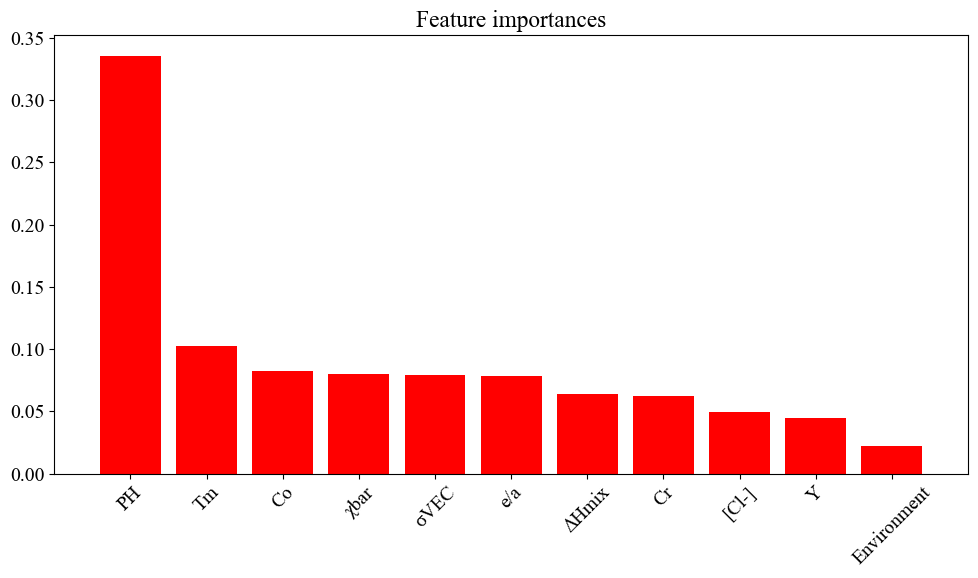

In [19]:
# Get the name of the input feature
feature_names = dataset.columns[:-1]

# Output each feature name and corresponding importance value
importances = cv_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# Draw a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [20]:
# Save the trained model
dump(cv_rf, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/CVRF_5.pkl', 'wb'))

# Bayesian Optimization

In [21]:
import optuna


def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    BOrf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    BOrf.fit(X_train, y_train)
    y_pred = BOrf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Run Bayesian Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print('Best MSE:', study.best_value)

# Output the best hyperparameters
best_params_rf = study.best_params
print('Best params for Random Forest:', best_params_rf)

# Training the best model
BOrf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'], 
                             max_depth=best_params_rf['max_depth'], 
                             min_samples_split=best_params_rf['min_samples_split'], 
                             min_samples_leaf=best_params_rf['min_samples_leaf'], 
                             random_state=42)

BOrf.fit(X_train, y_train)

[I 2025-04-25 00:05:16,122] A new study created in memory with name: no-name-979f4949-7c86-459b-b888-2d32d62e8d1a
[I 2025-04-25 00:05:16,320] Trial 0 finished with value: 0.020805203100284605 and parameters: {'n_estimators': 180, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.020805203100284605.
[I 2025-04-25 00:05:16,673] Trial 1 finished with value: 0.03250054759021277 and parameters: {'n_estimators': 506, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.020805203100284605.
[I 2025-04-25 00:05:17,631] Trial 2 finished with value: 0.022183438690653926 and parameters: {'n_estimators': 841, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.020805203100284605.
[I 2025-04-25 00:05:17,714] Trial 3 finished with value: 0.02292304507591816 and parameters: {'n_estimators': 88, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 w

Best MSE: 0.01638002101717937
Best params for Random Forest: {'n_estimators': 10, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}


RandomForestRegressor(max_depth=16, min_samples_split=4, n_estimators=10,
                      random_state=42)

In [22]:
print('Display of evaluation indexes of Bayesian optimization regression model in stochastic forest:')

# Predictive test set
y_pred_test = BOrf.predict(X_test)

# Predictive training set
y_pred_train = BOrf.predict(X_train)

# Calculate R^2 score
score_test = BOrf.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 score
score_train = BOrf.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indexes of Bayesian optimization regression model in stochastic forest:
R^2 score on the test set： 0.7954094560558326
R^2 score on the training set： 0.8345400076653482
MAE on the test set: 0.09144524083707559
MAE on the training set: 0.06415577815314161
MSE on the test set: 0.01638002101717937
MSE on the training set: 0.010573344270373429
RMSE on test set: 0.12798445615456344
RMSE on the training set: 0.10282676825794647


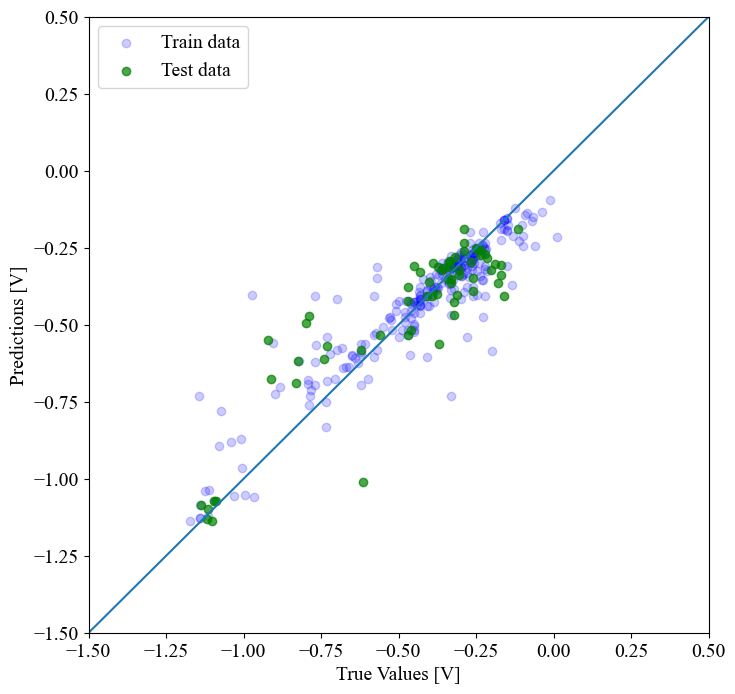

In [23]:
# The performance diagram of the model on the training set and the verification set
test_predictions = BOrf.predict(X_test).flatten()
train_predictions = BOrf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.365010
7            Tm    0.111783
3          σVEC    0.095234
5          χbar    0.081538
8            Co    0.074970
2         [Cl-]    0.066287
6           e/a    0.064926
4         ΔHmix    0.055327
9            Cr    0.036877
10            Y    0.034231
0   Environment    0.013817


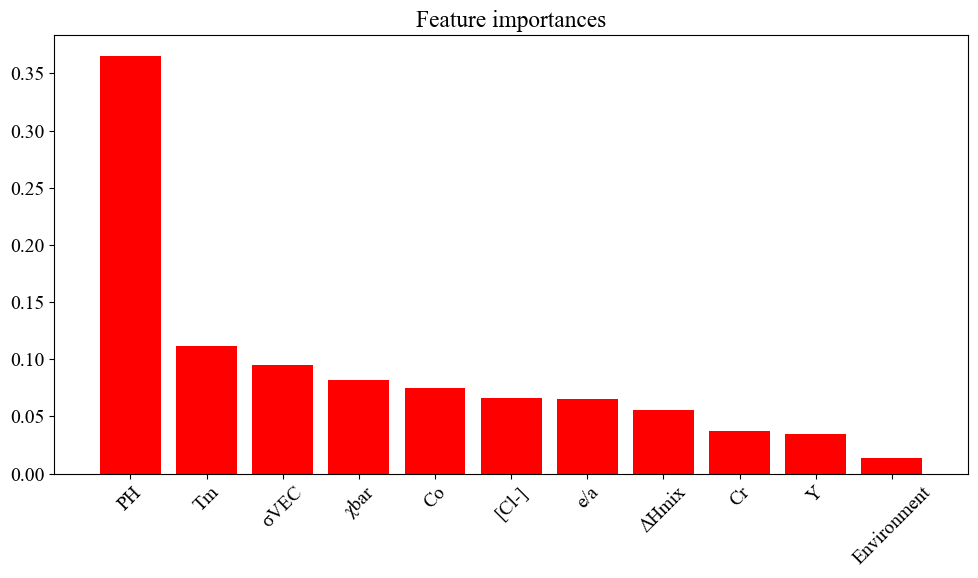

In [24]:
# Get the name of the input feature
feature_names = dataset.columns[:-1]

# Output each feature name and corresponding importance value
importances = BOrf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# Draw a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [26]:
# Save the trained model
dump(BOrf, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BORF_5.pkl', 'wb'))

# Support vector machine

In [27]:
from sklearn.svm import SVR

# Build a support vector machine regressor
svm = SVR()

# Training Support Vector Machine Regressor
svm.fit(X_train, y_train)

SVR()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Display of evaluation index of initial training regression model of support vector machine:')

# Predictive test set
y_pred_test = svm.predict(X_test)

# Predictive training set
y_pred_train = svm.predict(X_train)

# Calculate R^2 score
score_test = svm.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 score
score_train = svm.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation index of initial training regression model of support vector machine:
R^2 score on the test set： 0.7299103981472396
R^2 score on the training set： 0.6966242562692632
MAE on the test set: 0.10591086949688368
MAE on the training set: 0.09576988032037516
MSE on the test set: 0.021624036329250633
MSE on the training set: 0.019386536506407696
RMSE on test set: 0.14705113508317655
RMSE on the training set: 0.13923554325820578


<Figure size 800x600 with 0 Axes>

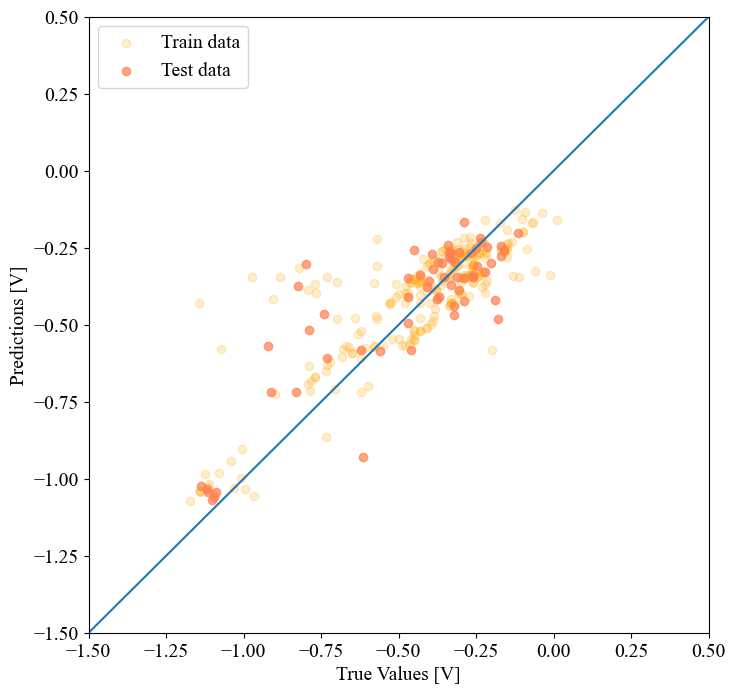

In [29]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# The performance diagram of the model on the training set and the verification set
test_predictions = svm.predict(X_test).flatten()
train_predictions = svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [30]:
# Save the trained model
dump(svm, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/SVM_5.pkl', 'wb'))

# Cross-validation

In [31]:
from sklearn.svm import SVR

# Build a support vector machine regressor
cv_svm = SVR()

# Predictive training set
y_pred_train_cv = cross_val_predict(cv_svm, X_train, y_train, cv=5)

# Fit the model on the entire training set
cv_svm.fit(X_train, y_train)

# Predictive test set
y_pred_test_cv = cv_svm.predict(X_test)

In [32]:
print('Display of evaluation indicators of support vector machine cross-validation regression model:')

# Calculate R^2 score
score_test = cv_svm.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 score
score_train = cv_svm.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indicators of support vector machine cross-validation regression model:
R^2 score on the test set： 0.7299103981472396
R^2 score on the training set： 0.6966242562692632
MAE on the test set: 0.10591086949688368
MAE on the training set: 0.1289179684634263
MSE on the test set: 0.021624036329250633
MSE on the training set: 0.03303178445538327
RMSE on test set: 0.14705113508317655
RMSE on the training set: 0.18174648402481758


<Figure size 800x600 with 0 Axes>

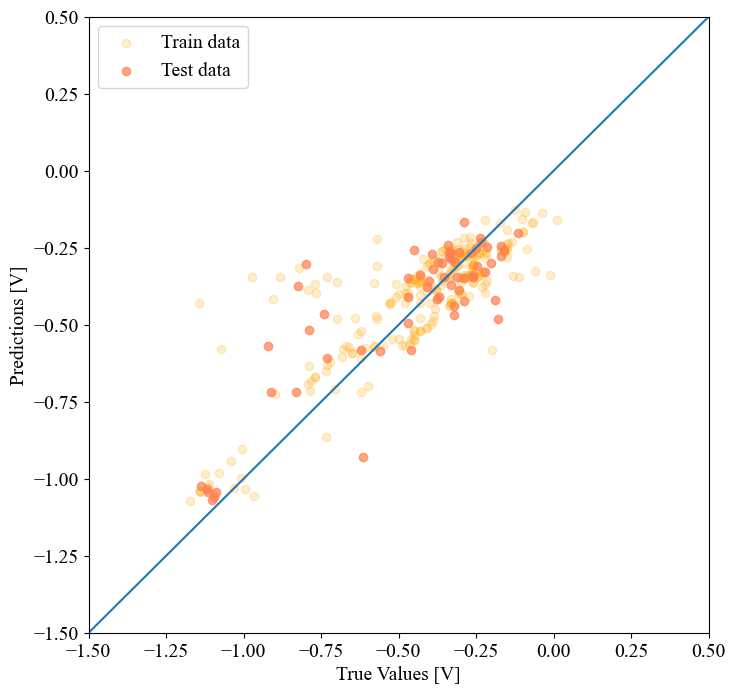

In [33]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# The performance diagram of the model on the training set and the verification set
test_predictions = cv_svm.predict(X_test).flatten()
train_predictions = cv_svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [34]:
# Save the trained model
dump(cv_svm, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/CVSVM_5.pkl', 'wb'))

# Bayesian Optimization

In [35]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna


# Define the target function
def objective(trial):
    # Define hyperparameter search space
    C = trial.suggest_loguniform('C', 50, 1000)
    gamma = trial.suggest_loguniform('gamma', 0.1, 10)
    epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    degree = 0
    

    # Define the model
    BO_svm = SVR(C=C, gamma=gamma, epsilon=epsilon, kernel=kernel, degree=degree)
    BO_svm.fit(X_train, y_train)

    # Calculate indicators
    y_pred = BO_svm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Returns the target value (minimize mean square error)
    return mse

# Call Optuna library for hyperparameter search
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Output optimal hyperparameters and minimize mean square error
print('Best parameters for SVM: ', study.best_params)
print('Best MSE: ', study.best_value)

# Training the model with optimal hyperparameters and evaluating performance
BO_svm = SVR(**study.best_params)
BO_svm.fit(X_train, y_train)

# Predictive test set
y_pred_test = BO_svm.predict(X_test)

# Predictive training set
y_pred_train = BO_svm.predict(X_train)

[I 2025-04-25 00:10:52,707] A new study created in memory with name: no-name-3b5c3dce-22c7-41d0-a8ce-b52c337f37e9
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_25880\489028020.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 50, 1000)
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_25880\489028020.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_25880\489028020.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

Best parameters for SVM:  {'C': 50.04089407387378, 'gamma': 0.10009457409183233, 'epsilon': 0.012821171261196055, 'kernel': 'rbf'}
Best MSE:  0.015741836089099844


In [36]:
print('Display of evaluation index of Bayesian optimization regression model of support vector machine:')

# Calculate R^2 score
score_test = BO_svm.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 score
score_train = BO_svm.score(X_train, y_train)
print('r^2ScoreOnTheTrainingSet：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation index of Bayesian optimization regression model of support vector machine:
R^2 score on the test set： 0.8033805448252439
r^2ScoreOnTheTrainingSet： 0.8325956611844397
MAE on the test set: 0.06671869934645086
MAE on the training set: 0.04340031382329672
MSE on the test set: 0.015741836089099844
MSE on the training set: 0.010697593307457601
RMSE on test set: 0.12546647396456093
RMSE on the training set: 0.10342917048617184


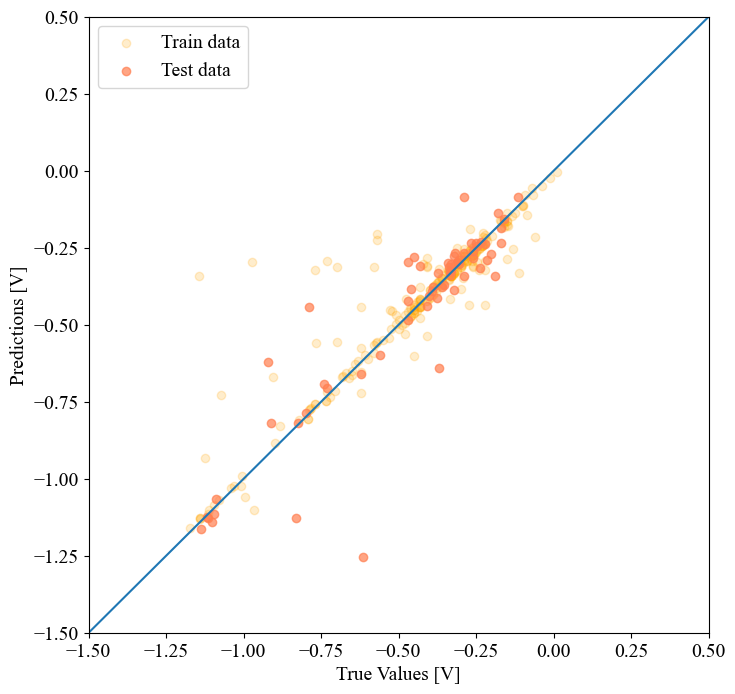

In [37]:
# The performance diagram of the model on the training set and the verification set
test_predictions = BO_svm.predict(X_test).flatten()
train_predictions = BO_svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [38]:
# Save the trained model
dump(BO_svm, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BOSVM_5.pkl', 'wb'))

# Gradient improvement decision tree

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define Gradient Boosting Regressor
gbdt = GradientBoostingRegressor()

# Training the model
gbdt.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
print('Display of evaluation indicators for initial training regression model of gradient enhancement decision tree:')

# Predictive test set
y_pred_test = gbdt.predict(X_test)

# Predictive training set
y_pred_train = gbdt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 on the test sethe test set Score: ",r2_test)
print("R^2 on the training sete training setScore: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test sethe test set:", mae_test)
print("MAE on the training sethe training set:", mae_train)

print("MSE on the test sethe test set:", mse_test)
print("MSE on the training sethe training set:", mse_train)

print("RMSE on test setest set:", rmse_test)
print("RMSE on the training set:e training set:", rmse_train)

Display of evaluation indicators for initial training regression model of gradient enhancement decision tree:
R^2 on the test sethe test set Score:  0.764409715418467
R^2 on the training sete training setScore:  0.8595923924779119
MAE on the test sethe test set: 0.10021034663652328
MAE on the training sethe training set: 0.06449069539210005
MSE on the test sethe test set: 0.018861936326548354
MSE on the training sethe training set: 0.008972428631012344
RMSE on test setest set: 0.1373387648355276
RMSE on the training set:e training set: 0.09472290446883659


<Figure size 800x600 with 0 Axes>

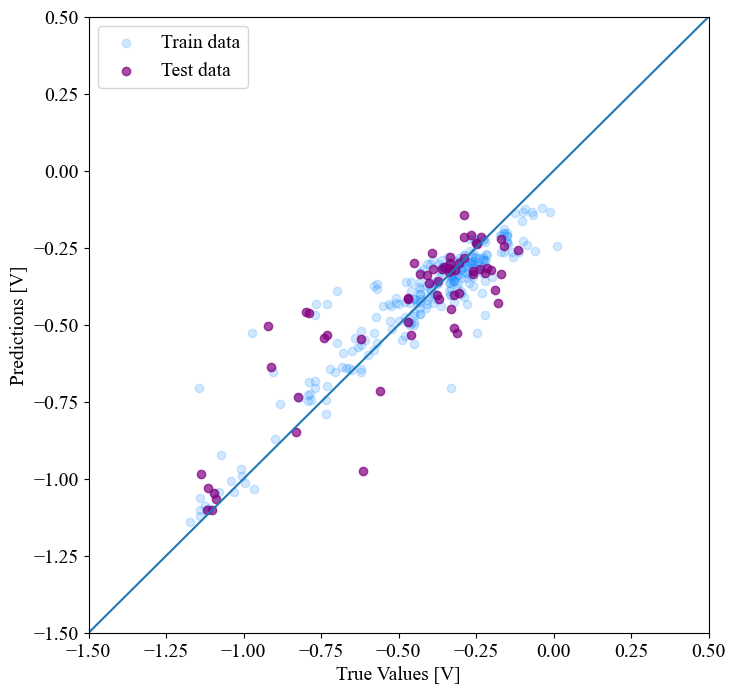

In [41]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = gbdt.predict(X_test).flatten()
train_predictions = gbdt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [42]:
# Save the trained model
dump(gbdt, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/GBDT_5.pkl', 'wb'))

# Cross-validation

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Defining Gradient Boosting Regressor
cv_gbdt = GradientBoostingRegressor()

# Predictive training set
y_pred_train_cv = cross_val_predict(cv_gbdt, X_train, y_train, cv=5)

# Fit the model on the entire training set
cv_gbdt.fit(X_train, y_train)

# Predictive test set
y_pred_test_cv = cv_gbdt.predict(X_test)

In [45]:
print('Gradient enhancement decision tree cross-validation regression model evaluation index display:')

# Calculate R^2 scores
score_test = cv_gbdt.score(X_test, y_test)
print('R^2 score on the test set：', score_test)

# Calculate R^2 scores
score_train = cv_gbdt.score(X_train, y_train)
print('R^2 score on the training set：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Gradient enhancement decision tree cross-validation regression model evaluation index display:
R^2 score on the test set： 0.7616589650828104
R^2 score on the training set： 0.8595923924779117
MAE on the test set: 0.10114811527365068
MAE on the training set: 0.13853050905972258
MSE on the test set: 0.019082168148813635
MSE on the training set: 0.036847585983166495
RMSE on test set: 0.13813822117290217
RMSE on the training set: 0.19195725040530898


<Figure size 800x600 with 0 Axes>

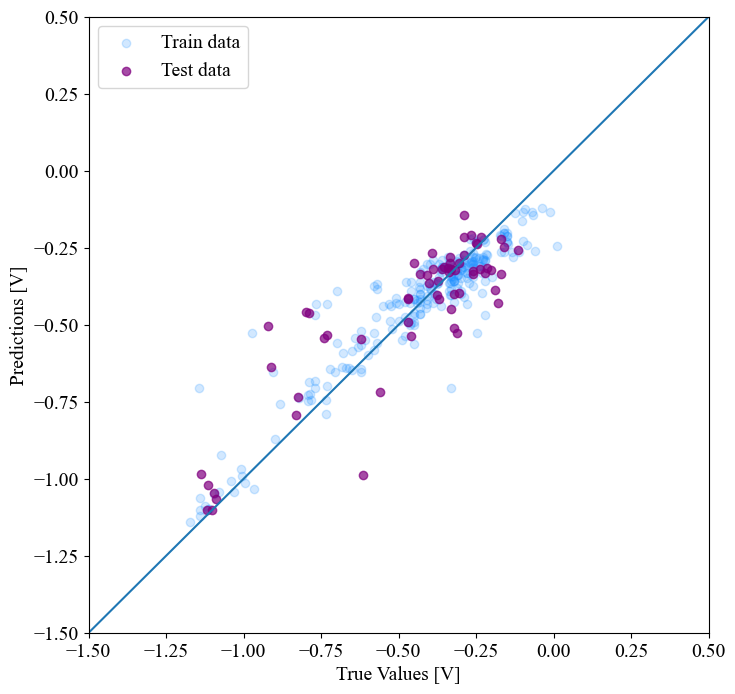

In [46]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = cv_gbdt.predict(X_test).flatten()
train_predictions = cv_gbdt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [47]:
# Save the trained model
dump(cv_gbdt, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/CVGBDT_5.pkl', 'wb'))

# Bayesian Optimization

In [48]:
import optuna

# Define the target function
def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        
    # Build a gradient boosting tree model
    BOmodel = GradientBoostingRegressor(n_estimators=n_estimators,
                                       learning_rate=learning_rate,
                                       max_depth=max_depth,
                                       max_features=max_features,
                                       loss='squared_error',
                                       random_state=42)
    # Training the model
    BOmodel.fit(X_train, y_train)
    
    # Calculate prediction error
    y_pred = BOmodel.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Running the optimized search algorithm
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Print optimal parameters
print(f'Best params: {study.best_params}')

# Build a gradient boost tree model and use optimal parameters for training and prediction
BOmodel = GradientBoostingRegressor(n_estimators=study.best_params['n_estimators'],
                                   learning_rate=study.best_params['learning_rate'],
                                   max_depth=study.best_params['max_depth'],
                                   max_features=study.best_params['max_features'],
                                   loss='squared_error',
                                    random_state=42)
BOmodel.fit(X_train, y_train)

# Predictive test set
y_pred_test = BOmodel.predict(X_test)

# Predictive training set
y_pred_train = BOmodel.predict(X_train)

[I 2025-04-25 00:15:27,756] A new study created in memory with name: no-name-cfcb4d15-bff1-48c7-8ae7-05cb76da13a8
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_25880\1315341052.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2025-04-25 00:15:27,924] Trial 0 finished with value: 0.01809082114747857 and parameters: {'n_estimators': 170, 'learning_rate': 0.013949422743971963, 'max_depth': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.01809082114747857.
C:\Users\SUMANTH REDDY\AppData\Local\Temp\ipykernel_25880\1315341052.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_r

Best params: {'n_estimators': 33, 'learning_rate': 0.3602833360321738, 'max_depth': 4, 'max_features': 'sqrt'}


In [49]:
print('Display of evaluation index of Bayesian optimization regression model in gradient enhancement decision tree：')

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 Score on the test set: ",r2_test)
print("R^2 Score on the training set: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation index of Bayesian optimization regression model in gradient enhancement decision tree：
R^2 Score on the test set:  0.8412178116458744
R^2 Score on the training set:  0.9149320017733437
MAE on the test set: 0.08476380201706973
MAE on the training set: 0.040680312934255364
MSE on the test set: 0.012712491654081936
MSE on the training set: 0.00543607683616207
RMSE on test set: 0.11274968582697663
RMSE on the training set: 0.07372975543267501


<Figure size 800x600 with 0 Axes>

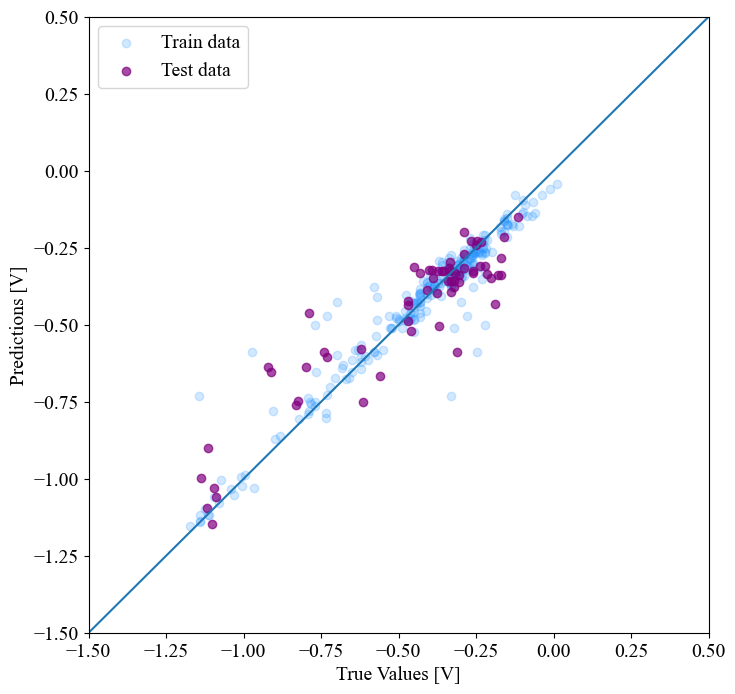

In [50]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = BOmodel.predict(X_test).flatten()
train_predictions = BOmodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [ ]:
# Save the trained model
dump(BOmodel, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BOGBDT_5.pkl', 'wb'))

# Extreme gradient boost

In [52]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create XGBoost regression model
xgbt = xgb.XGBRegressor()

# Fit the model on the training set
xgbt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [54]:
print('Display of evaluation indexes for initial training model for extreme gradient enhancement:')

# 预测测试集
y_pred_test = xgbt.predict(X_test)

# 预测训练集
y_pred_train = xgbt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 Score on test set: ",r2_test)
print("R^2 Score on the training set: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indexes for initial training model for extreme gradient enhancement:
R^2 Score on test set:  0.7602432894105398
R^2 Score on the training set:  0.9380005692340214
MAE on the test set: 0.0940819017111309
MAE on the training set: 0.015538283932540154
MSE on the test set: 0.019195510617230124
MSE on training set: 0.00396193253007051
RMSE on test set: 0.1385478639937481
RMSE on the training set: 0.062943883976686


<Figure size 800x600 with 0 Axes>

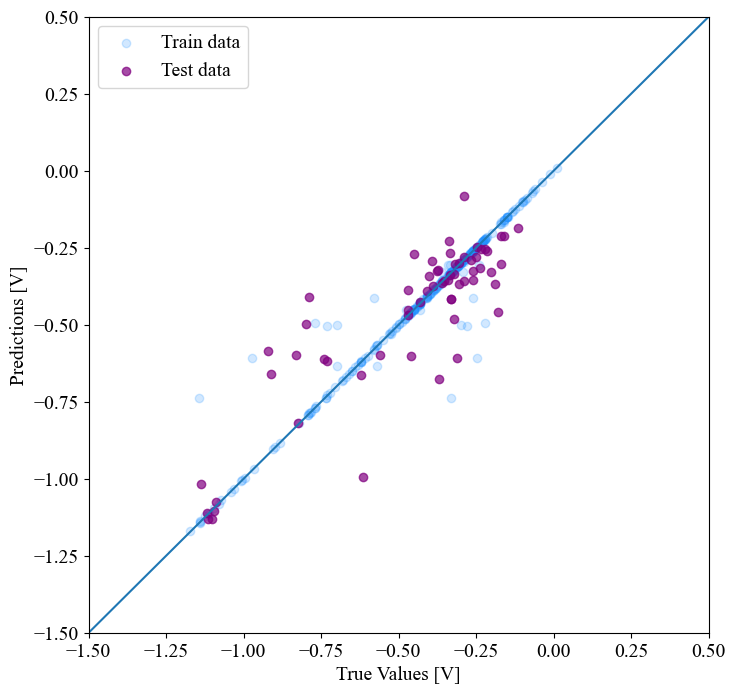

In [57]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = xgbt.predict(X_test).flatten()
train_predictions = xgbt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [56]:
# Save the trained model
dump(xgbt, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/XGBT_5.pkl', 'wb'))

# Bayesian Optimization

In [58]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 30, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    BO_xgbt = XGBRegressor(**params, random_state=42)
    BO_xgbt.fit(X_train, y_train)
    
    # Calculate indicators
    y_pred = BO_xgbt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Run Bayesian Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print('Best MSE:', study.best_value)

# Output the best hyperparameters
best_params_xgb = study.best_params
print('Best params for XGBoost:', best_params_xgb)

# Training the best model
BO_xgbt = XGBRegressor(**best_params_xgb, random_state=42)
BO_xgbt.fit(X_train, y_train)

[I 2025-04-25 00:19:58,014] A new study created in memory with name: no-name-d15cb2ff-16b4-4058-a630-f3f27c41753a
[I 2025-04-25 00:19:58,096] Trial 0 finished with value: 0.023514288773966215 and parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.07374254333483599, 'subsample': 0.66895538864409, 'colsample_bytree': 0.6176379192322221, 'min_child_weight': 10}. Best is trial 0 with value: 0.023514288773966215.
[I 2025-04-25 00:19:58,111] Trial 1 finished with value: 0.016250000716700446 and parameters: {'n_estimators': 24, 'max_depth': 6, 'learning_rate': 0.4321535887538817, 'subsample': 0.6542646624893662, 'colsample_bytree': 0.6280129898011609, 'min_child_weight': 2}. Best is trial 1 with value: 0.016250000716700446.
[I 2025-04-25 00:19:58,191] Trial 2 finished with value: 0.026217571858931525 and parameters: {'n_estimators': 68, 'max_depth': 22, 'learning_rate': 0.4536570623969008, 'subsample': 0.9704366774792571, 'colsample_bytree': 0.2522131569788024, 'min_child_we

Best MSE: 0.011884789969178456
Best params for XGBoost: {'n_estimators': 45, 'max_depth': 16, 'learning_rate': 0.25678992423470676, 'subsample': 0.5578216133841346, 'colsample_bytree': 0.4992869928320454, 'min_child_weight': 3}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4992869928320454, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25678992423470676,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=45, n_jobs=None,
             num_parallel_tree=None, ...)

In [59]:
print('Display of evaluation indexes for Bayesian optimization model for extreme gradient enhancement:')

# Predictive test set
y_pred_test = BO_xgbt.predict(X_test)

# Predictive training set
y_pred_train = BO_xgbt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 Score on test set: ",r2_test)
print("R^2 Score on the training set: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indexes for Bayesian optimization model for extreme gradient enhancement:
R^2 Score on test set:  0.8515560119302514
R^2 Score on the training set:  0.9199688651694589
MAE on the test set: 0.08025503634081946
MAE on the training set: 0.034133206508580656
MSE on test set: 0.011884789969178456
MSE on the training set: 0.005114207543298488
RMSE on test set: 0.10901738379349624
RMSE on the training set: 0.07151368780379382


<Figure size 800x600 with 0 Axes>

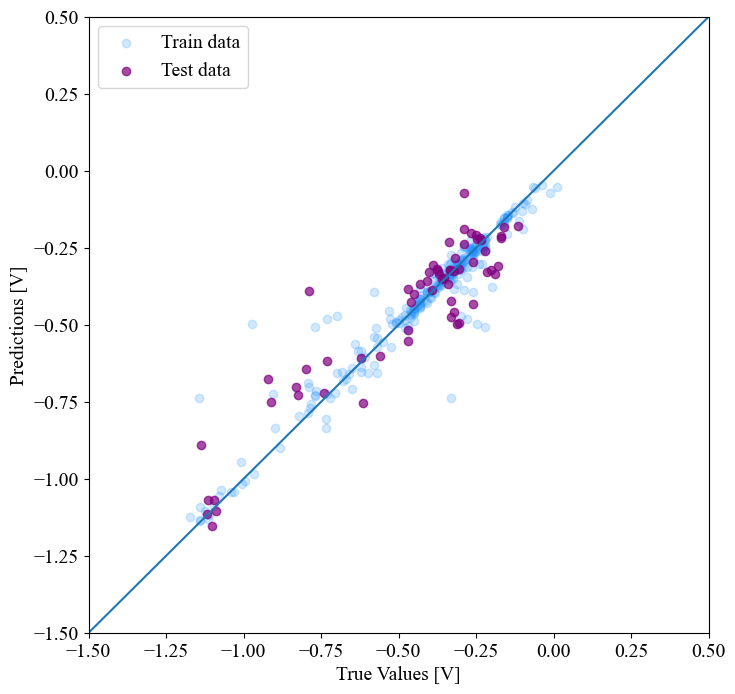

In [60]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = BO_xgbt.predict(X_test).flatten()
train_predictions = BO_xgbt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [61]:
# Save the trained model
dump(BO_xgbt, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BOXGBT_5.pkl', 'wb'))

# Ridge Return

In [62]:
from sklearn.linear_model import Ridge

# Create a ridge regression model
rr = Ridge()

# Fit the model on the training set
rr.fit(X_train, y_train)

Ridge()

In [63]:
print('Display of evaluation index of the initial training model of ridge regression:')

# Predictive test set
y_pred_test = rr.predict(X_test)

# Predictive training set
y_pred_train = rr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 Score on test set: ",r2_test)
print("R^2 Score on training set: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on the test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation index of the initial training model of ridge regression:
R^2 Score on test set:  0.5365175366640524
R^2 Score on training set:  0.424871900145551
MAE on the test set: 0.1550974537944655
MAE on the training set: 0.14696021417766916
MSE on the test set: 0.037107543409282386
MSE on the training set: 0.036752252393603344
RMSE on the test set: 0.19263318356213288
RMSE on the training set: 0.19170876973577225


<Figure size 800x600 with 0 Axes>

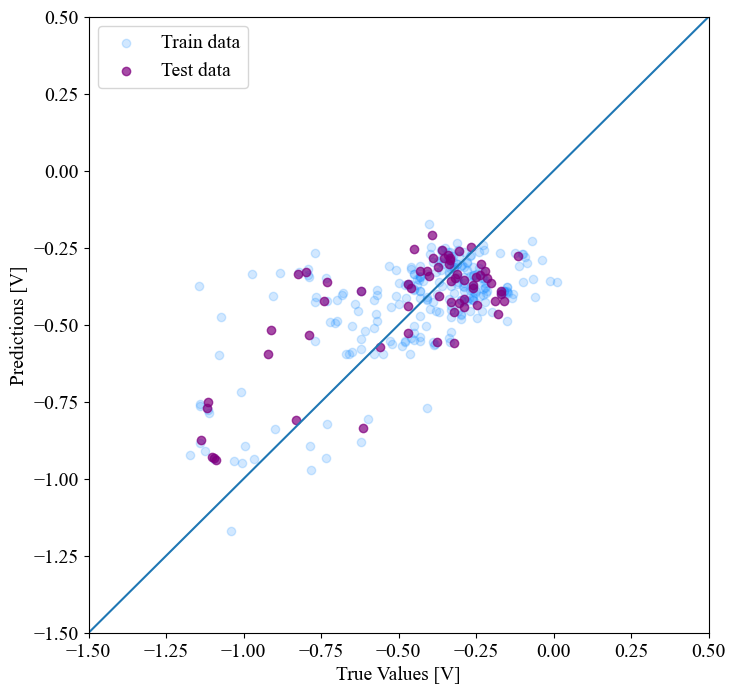

In [64]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = rr.predict(X_test).flatten()
train_predictions = rr.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [ ]:
# Save the trained model
dump(rr, open('D:\IPython\Corrosion-ML\saved_model2\岭回归\初训练模型\RR_5.pkl', 'wb'))

# Bayesian Optimization

In [65]:
import optuna

# Define the target function for ridge regression
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    
    # Create a ridge regression model
    BO_rr = Ridge(alpha=alpha, random_state=42)
    
    # Fit the model on the training set
    BO_rr.fit(X_train, y_train)
    
    # Make predictions on test sets
    y_pred = BO_rr.predict(X_test)
    
    # Calculate mean square error
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Run Bayesian Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Output optimal mean square error and optimal hyperparameter
best_params_ridge = study.best_params
print('Best MSE:', study.best_value)
print('Best params for Ridge Regression:', best_params_ridge)

# Initialize the ridge regression model using the best hyperparameter
BO_rr = Ridge(**best_params_ridge, random_state=42)

# Fit the best model on the training set
BO_rr.fit(X_train, y_train)

[I 2025-04-25 00:23:45,307] A new study created in memory with name: no-name-143ab228-32b0-4d98-85bf-0539a8e07792
[I 2025-04-25 00:23:45,315] Trial 0 finished with value: 0.03708032645870754 and parameters: {'alpha': 0.6685265399627348}. Best is trial 0 with value: 0.03708032645870754.
[I 2025-04-25 00:23:45,320] Trial 1 finished with value: 0.03743898836602529 and parameters: {'alpha': 4.967129626552997}. Best is trial 0 with value: 0.03708032645870754.
[I 2025-04-25 00:23:45,324] Trial 2 finished with value: 0.03703486693962747 and parameters: {'alpha': 0.11257260063553394}. Best is trial 2 with value: 0.03703486693962747.
[I 2025-04-25 00:23:45,327] Trial 3 finished with value: 0.03734807678212499 and parameters: {'alpha': 3.8903805948926236}. Best is trial 2 with value: 0.03703486693962747.
[I 2025-04-25 00:23:45,330] Trial 4 finished with value: 0.037027204426871886 and parameters: {'alpha': 0.01856744576429698}. Best is trial 4 with value: 0.037027204426871886.
[I 2025-04-25 00:2

Best MSE: 0.037026506446942845
Best params for Ridge Regression: {'alpha': 0.01000014894131699}


Ridge(alpha=0.01000014894131699, random_state=42)

In [66]:
print('Display of evaluation indexes for Bayesian optimization model of ridge regression:')

# Predictive test set
y_pred_test = BO_rr.predict(X_test)

# Predictive training set
y_pred_train = BO_rr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 Score on test set: ",r2_test)
print("R^2 Score on the training set: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("MAE on the test set:", mae_test)
print("MAE on the training set:", mae_train)

print("MSE on the test set:", mse_test)
print("MSE on the training set:", mse_train)

print("RMSE on test set:", rmse_test)
print("RMSE on the training set:", rmse_train)

Display of evaluation indexes for Bayesian optimization model of ridge regression:
R^2 Score on test set:  0.5375297085158005
R^2 Score on the training set:  0.42488689909119515
MAE on the test set: 0.154931362033883
MAE on the training set: 0.14698021346127285
MSE on the test set: 0.037026506446942845
MSE on the training set: 0.03675129392011528
RMSE on test set: 0.1924227285092456
RMSE on the training set: 0.19170626990298278


<Figure size 800x600 with 0 Axes>

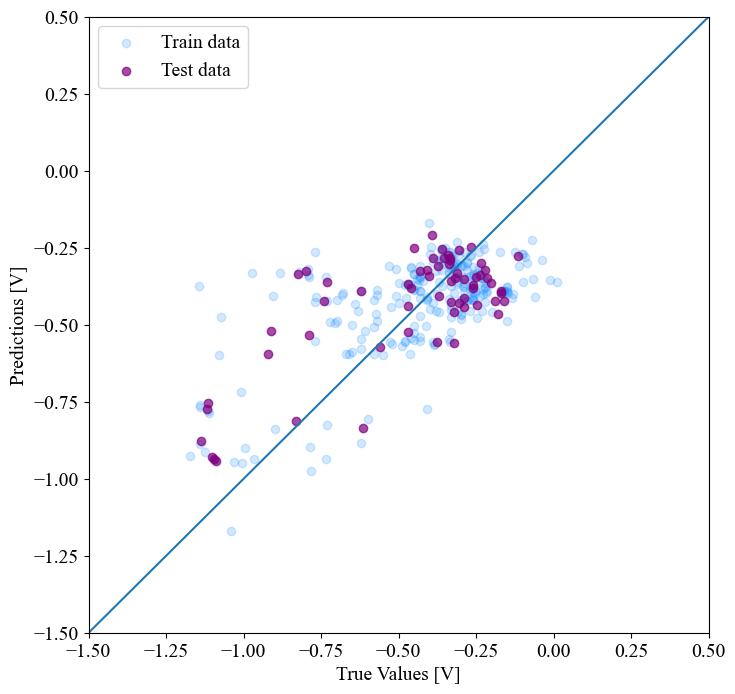

In [67]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Graph of the performance of the model on the training set and test set
test_predictions = BO_rr.predict(X_test).flatten()
train_predictions = BO_rr.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [68]:
# Save the trained model
dump(BO_rr, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BORR_5.pkl', 'wb'))